In [4]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Paridhi Pasrija\AppData\Local\Temp\pip-install-d1b7u3jr\tensorflow-gpu_4a545506315a451ca9d72ac69aa0604b\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-g

In [129]:
import os
import time
import uuid
import cv2

In [130]:
import os
print(os.getcwd())

C:\Users\Paridhi Pasrija


In [131]:
import os
os.makedirs('images', exist_ok=True)

In [19]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [186]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [187]:
!labelme

In [13]:
!pip install tensorflow

In [188]:
import tensorflow as tf
import json #labels are in json format 
import numpy as np #help with data preprocessing 
from matplotlib import pyplot as plt #visualize our images 

In [189]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [190]:
tf.config.list_physical_devices('GPU')

[]

In [200]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [201]:
images.as_numpy_iterator().next()

b'data\\images\\117b50b9-1e2f-11ee-a9c9-ff658ee17ec9.jpg'

In [202]:
def load_image(x): #load an image file using tensorflow 
    byte_img = tf.io.read_file(x) #reads the file as a sequence of bytes 
    img = tf.io.decode_jpeg(byte_img) #converts the byte-encoded image data into a TensorFlow tensor representing the image and assigns it to the img variable
    return img

In [203]:
images = images.map(load_image) #using the map() function in TensorFlow to apply the load_image function to each element in the images dataset

In [204]:
images.as_numpy_iterator().next()

array([[[146, 150, 133],
        [147, 151, 134],
        [147, 150, 131],
        ...,
        [ 22,  26,  27],
        [ 25,  29,  32],
        [ 25,  29,  32]],

       [[145, 149, 132],
        [146, 150, 133],
        [147, 150, 131],
        ...,
        [ 22,  26,  27],
        [ 24,  28,  29],
        [ 25,  29,  30]],

       [[145, 149, 132],
        [146, 150, 133],
        [147, 150, 131],
        ...,
        [ 22,  24,  23],
        [ 22,  26,  25],
        [ 25,  29,  28]],

       ...,

       [[ 46,  20,   7],
        [ 49,  23,  10],
        [ 50,  24,  11],
        ...,
        [ 27,  54,  65],
        [ 38,  65,  76],
        [ 39,  66,  77]],

       [[ 50,  23,  12],
        [ 48,  21,  10],
        [ 45,  19,   6],
        ...,
        [ 40,  67,  78],
        [ 43,  70,  81],
        [ 35,  62,  73]],

       [[ 50,  23,  12],
        [ 50,  23,  12],
        [ 47,  21,   8],
        ...,
        [ 40,  67,  78],
        [ 38,  65,  76],
        [ 43,  70,  81]]

In [205]:
type(images) #viewing tensorflow data pipeline in output 

tensorflow.python.data.ops.map_op._MapDataset

In [206]:
image_generator = images.batch(4).as_numpy_iterator()

In [207]:
plot_images = image_generator.next() #going to return a new batch of data each time 

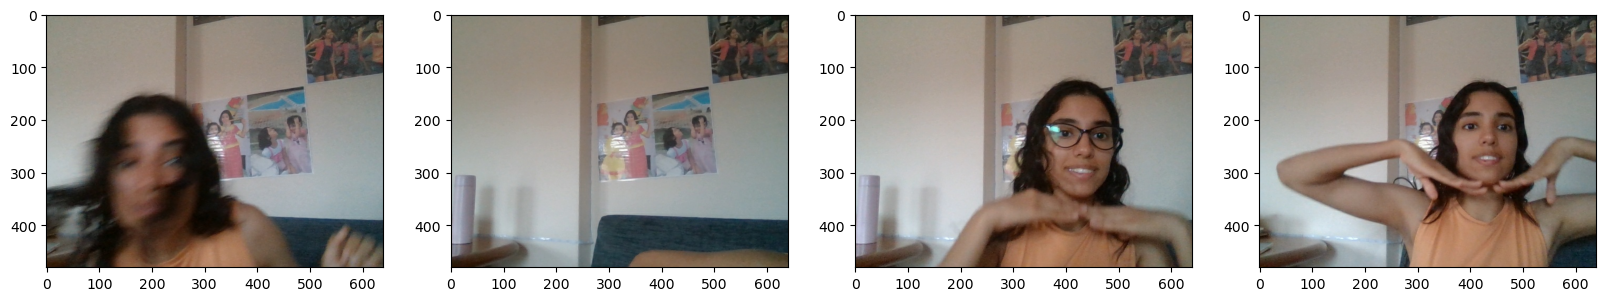

In [208]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [209]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath) 

In [27]:
!pip install albumentations

In [210]:
import albumentations as alb #to perform image augmentation on images and labels 

In [211]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), #horizontally flips the input image with a probability of 0.5 (50% chance).
                         alb.RandomBrightnessContrast(p=0.2), 
                         alb.RandomGamma(p=0.2), #randomly adjusts the gamma (nonlinear brightness) of the input image
                         alb.RGBShift(p=0.2), # randomly shifts the RGB channels of the input image
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', #specifies the parameters for bounding box annotations. It sets the format to 'albumentations' and specifies the label field name as 'class_labels'. 
                                                  label_fields=['class_labels']))

In [212]:
img = cv2.imread(os.path.join('data','train', 'images','0f3a7763-1e2f-11ee-802c-ff658ee17ec9.jpg'))

In [213]:
img

array([[[128, 139, 143],
        [128, 139, 143],
        [128, 140, 142],
        ...,
        [ 26,  27,  37],
        [ 25,  27,  35],
        [ 23,  25,  33]],

       [[129, 140, 144],
        [129, 140, 144],
        [129, 141, 143],
        ...,
        [ 27,  29,  37],
        [ 25,  27,  35],
        [ 23,  25,  33]],

       [[129, 140, 144],
        [129, 140, 144],
        [128, 140, 142],
        ...,
        [ 26,  29,  37],
        [ 26,  28,  36],
        [ 25,  28,  33]],

       ...,

       [[ 10,  25,  57],
        [ 11,  26,  58],
        [ 12,  27,  59],
        ...,
        [ 57,  44,  22],
        [ 62,  49,  27],
        [ 69,  56,  34]],

       [[ 12,  27,  59],
        [ 12,  27,  59],
        [ 12,  27,  59],
        ...,
        [ 63,  51,  27],
        [ 66,  54,  30],
        [ 74,  62,  38]],

       [[ 11,  26,  58],
        [ 12,  27,  59],
        [ 13,  28,  60],
        ...,
        [ 64,  52,  28],
        [ 62,  50,  26],
        [ 67,  55,  31]]

In [214]:
with open(os.path.join('data', 'train', 'labels', '0f3a7763-1e2f-11ee-802c-ff658ee17ec9.json'), 'r') as f:
    label = json.load(f)

In [215]:
label

{'version': '5.2.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[245.8974358974359, 134.35897435897434],
    [517.1794871794872, 388.71794871794873]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\0f3a7763-1e2f-11ee-802c-ff658ee17ec9.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGR

In [216]:
label['shapes'][0]['points']

[[245.8974358974359, 134.35897435897434],
 [517.1794871794872, 388.71794871794873]]

In [217]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [218]:
coords

[245.8974358974359, 134.35897435897434, 517.1794871794872, 388.71794871794873]

In [219]:
coords = list(np.divide(coords, [640,480,640,480])) #dividing our coordinates by width and height of images

In [220]:
coords

[0.3842147435897436,
 0.27991452991452986,
 0.8080929487179487,
 0.8098290598290598]

In [221]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face']) #calling the augmentor function written earlier

In [222]:
augmented['bboxes']

[(0.0, 0.20284900284900287, 0.5713390313390313, 0.7680911680911682)]

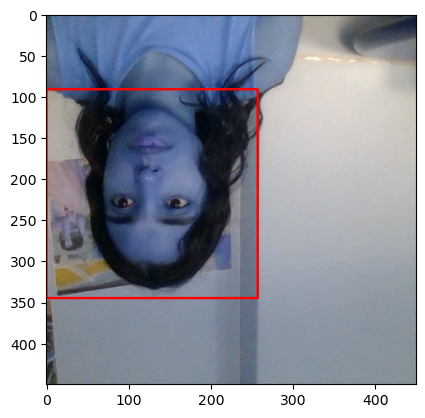

In [223]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)), #represent the first 2 values
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), #represent the last two values 
                    (255,0,0), 2) #specifying the colour, 2 is the thickness of the actual image 

plt.imshow(augmented['image'])

In [224]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001] #coordinates for images that dont have labels 
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json') 
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: #takes the first bounding box from the augmented image and assigns it to the annotation's bounding box, while setting the class label to 1.
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)      

In [225]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False) #loading augmented images to tensorflow dataset
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [226]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255) #getting image size between 0 and 1 so we can use the sigmoid function

In [227]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [228]:
train_images.as_numpy_iterator().next()

array([[[0.3211397 , 0.34129903, 0.32947305],
        [0.35055146, 0.39546567, 0.3807598 ],
        [0.35318628, 0.4002451 , 0.39240196],
        ...,
        [0.64724267, 0.6158701 , 0.5648897 ],
        [0.6403799 , 0.6129289 , 0.55018383],
        [0.63829654, 0.61329657, 0.5487132 ]],

       [[0.29252452, 0.3317402 , 0.32781863],
        [0.34620097, 0.39411765, 0.38713235],
        [0.33737746, 0.37659314, 0.37267157],
        ...,
        [0.6392157 , 0.6156863 , 0.5617647 ],
        [0.63302696, 0.6107843 , 0.5554534 ],
        [0.63278186, 0.6168505 , 0.5602328 ]],

       [[0.33872548, 0.38088235, 0.38333333],
        [0.32873774, 0.38265932, 0.38265932],
        [0.30147058, 0.34068626, 0.3367647 ],
        ...,
        [0.6401348 , 0.6166054 , 0.5695466 ],
        [0.6343137 , 0.6186274 , 0.5715686 ],
        [0.6248162 , 0.6091299 , 0.5620711 ]],

       ...,

       [[0.5485294 , 0.47107843, 0.40441176],
        [0.5608456 , 0.47947302, 0.41280636],
        [0.5754902 , 0

In [229]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [230]:
# now loading labels to tensorflow dataset for the json file 
# in the second statement, we are going through each label-x to get their class and bbox 
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [231]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [232]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [233]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.01151, 0.2976 , 0.5664 , 0.8354 ], dtype=float16))

In [234]:
# check partition lenghts
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(5040, 5040, 1140, 1140, 1020, 1020)

In [235]:
train = tf.data.Dataset.zip((train_images, train_labels)) # combine the training images and labels 
train = train.shuffle(5000) 
train = train.batch(8) # each batch will be represented as 8 images and 8 labels 
train = train.prefetch(4) # model can perform computations on the current batch while the next batch is being prepared 

In [236]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [237]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [238]:
train.as_numpy_iterator().next()[1] # in the output we will get all our classes and bounding boxes 

(array([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.4106 , 0.0393 , 1.     , 0.632  ],
        [0.6914 , 0.2316 , 1.     , 0.7603 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.4155 , 0.3147 , 0.951  , 0.8833 ],
        [0.3167 , 0.2458 , 0.8237 , 0.8135 ],
        [0.05026, 0.0792 , 0.6724 , 0.6685 ],
        [0.2693 , 0.2942 , 0.739  , 0.8345 ],
        [0.3435 , 0.0871 , 0.942  , 0.7207 ]], dtype=float16))

In [239]:
data_samples = train.as_numpy_iterator() # allows us to loop through all of the different batches 

In [240]:
res = data_samples.next() # to grab the next batch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


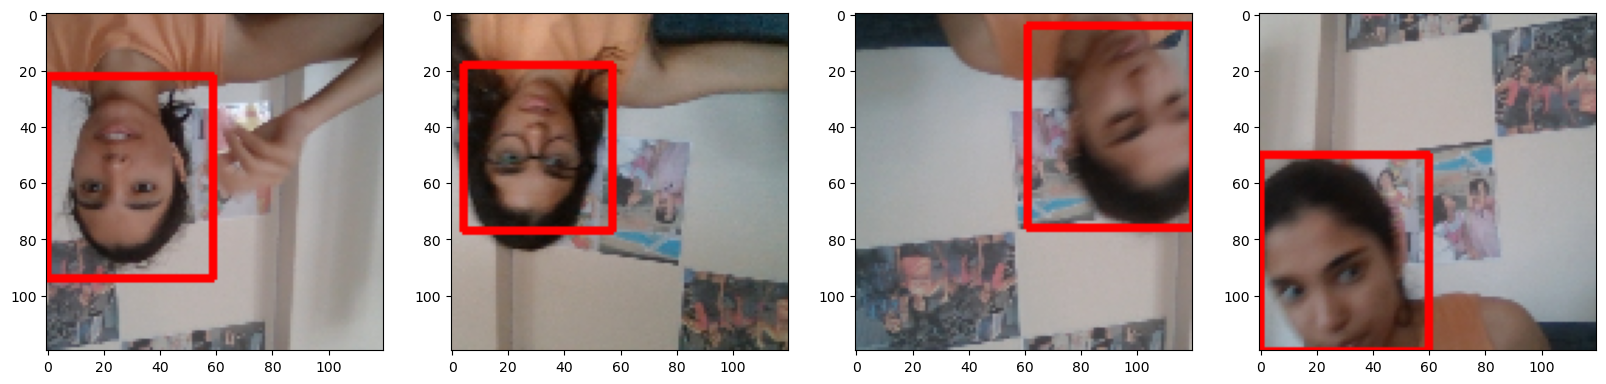

In [241]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx] #retrieves the image corresponding to the current index 
    sample_coords = res[1][1][idx] #retrives the coordinates of the current index
    # rectangle is defined by two parts, top left and bottom right coordinates 
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2) #represents color of rectangle and thickness of rectangle border 

    ax[idx].imshow(sample_image)

In [242]:
from tensorflow.keras.models import Model # base model class 
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D # different layers 
from tensorflow.keras.applications import VGG16 # huge neural network that is pre-trained, classification model 

In [243]:
vgg = VGG16(include_top=False) # gets rid of the final layers that we dont require 

In [244]:
vgg.summary() #none in the output represents number of samples, width+height, number of channels  

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [245]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    # passing input layer to vgg layer 
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg) # condensing all info from vgg layer using global max pooling layer, will return only the max values 
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    # classification output and regression output 
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [246]:
facetracker = build_model()

In [247]:
facetracker.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_10[0][0]']               
                                512)                                                              
                                                                                                  
 global_max_pooling2d_6 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [248]:
X, y = train.as_numpy_iterator().next() # x-images, y-labels 

In [249]:
X.shape

(8, 120, 120, 3)

In [250]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 720ms/step


In [251]:
classes, coords

(array([[0.6732246 ],
        [0.5732    ],
        [0.58139366],
        [0.6110018 ],
        [0.6005962 ],
        [0.5575115 ],
        [0.55012035],
        [0.60682935]], dtype=float32),
 array([[0.4391627 , 0.8138478 , 0.33481142, 0.66447717],
        [0.42130813, 0.8114717 , 0.4075571 , 0.5886784 ],
        [0.46992698, 0.79484683, 0.2934809 , 0.5555395 ],
        [0.4613052 , 0.6575906 , 0.39733604, 0.45792183],
        [0.48205557, 0.85417086, 0.3867994 , 0.527529  ],
        [0.43386304, 0.7587507 , 0.38874364, 0.5438254 ],
        [0.51752234, 0.77965   , 0.3285366 , 0.5022137 ],
        [0.50672454, 0.712425  , 0.4856885 , 0.55496377]], dtype=float32))

In [252]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch # decay factor per batch 

In [253]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)
# creates an instance of the adam optimizer 
# learning rate controls how quickly the model learns from the gradient updates 
# Decay is applied to the learning rate over time to gradually reduce it and improve convergence

In [254]:
def localization_loss(y_true, yhat):   # calculates the localization loss between the predicted bounding boxes (yhat) and the true bounding boxes (y_true).         
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2])) # calculates the coordinate loss component of the localization loss
    # calculate the height (h_true) and width (w_true) of the true bounding boxes by subtracting the x and y coordinates accordingly.             
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 
    # same for predicted bounding boxes 
    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    # calculates the size loss component of the localization loss
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    # to quantify the discrepancy between the predicted and true bounding boxes.
    return delta_coord + delta_size

In [255]:
classloss = tf.keras.losses.BinaryCrossentropy() #passed to keras pipeline
regressloss = localization_loss

In [256]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.472959>

In [257]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6618757>

In [258]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.472959>

In [259]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): # eyetracker is a pre-built neural network 
        super().__init__(**kwargs) # **kwargs notation allows for any additional keyword arguments to be passed to the constructor
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt # The optimizer will be used for updating the model's parameters during training
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: # to trace the operations performed during the forward pass
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes) # calculates the class loss using the class loss function (self.closs) by comparing the predicted classes (classes) with the target class labels (y[0])
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords) # comparing the predicted coordinates (coords) with the target bounding box coordinates (y[1])
            
            total_loss = batch_localizationloss+0.5*batch_classloss 
            
            grad = tape.gradient(total_loss, self.model.trainable_variables) # calculates the gradients of the total_loss with respect to the trainable variables of the model
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables)) # applies the computed gradients to update the model's trainable variables using the optimizer (opt). It performs the gradient descent step
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): # same step without the gradient calculations 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [260]:
model = FaceTracker(facetracker)

In [261]:
model.compile(opt, classloss, regressloss)

In [262]:
logdir='logs'

In [263]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [264]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
630/630 [==============================] - 1521s 2s/step - total_loss: 0.4120 - class_loss: 0.1022 - regress_loss: 0.3609 - val_total_loss: 0.1068 - val_class_loss: 1.3142e-04 - val_regress_loss: 0.1067
Epoch 2/10
630/630 [==============================] - 1252s 2s/step - total_loss: 0.1175 - class_loss: 0.0285 - regress_loss: 0.1033 - val_total_loss: 0.0101 - val_class_loss: 0.0120 - val_regress_loss: 0.0041
Epoch 3/10
630/630 [==============================] - 1095s 2s/step - total_loss: 0.0501 - class_loss: 0.0115 - regress_loss: 0.0444 - val_total_loss: 0.0069 - val_class_loss: 8.0586e-04 - val_regress_loss: 0.0065
Epoch 4/10
630/630 [==============================] - 1059s 2s/step - total_loss: 0.0363 - class_loss: 0.0110 - regress_loss: 0.0308 - val_total_loss: 0.0110 - val_class_loss: 5.1019e-04 - val_regress_loss: 0.0108
Epoch 5/10
630/630 [==============================] - 1090s 2s/step - total_loss: 0.0291 - class_loss: 0.0061 - regress_loss: 0.0260 - val_total_los

In [265]:
hist.history

{'total_loss': [0.043395232409238815,
  0.012022595852613449,
  0.0210921298712492,
  0.017527827993035316,
  0.05334233492612839,
  0.012382237240672112,
  0.018821341916918755,
  0.007477182429283857,
  0.007521516643464565,
  0.002813679166138172],
 'class_loss': [0.003668587189167738,
  0.001837260671891272,
  0.0020900885574519634,
  0.002094143070280552,
  0.0011722136987373233,
  0.00021687539992854,
  0.004858783446252346,
  5.978482658974826e-05,
  8.419268851866946e-06,
  5.692459671990946e-05],
 'regress_loss': [0.04156094044446945,
  0.01110396534204483,
  0.020047085359692574,
  0.016480756923556328,
  0.05275622755289078,
  0.012273799628019333,
  0.016391949728131294,
  0.007447290234267712,
  0.007517307065427303,
  0.002785216784104705],
 'val_total_loss': [0.10676827281713486,
  0.010088436305522919,
  0.006924594286829233,
  0.011040071956813335,
  0.08278803527355194,
  0.020103037357330322,
  0.03341183066368103,
  0.005576743744313717,
  0.014677371829748154,
  0.

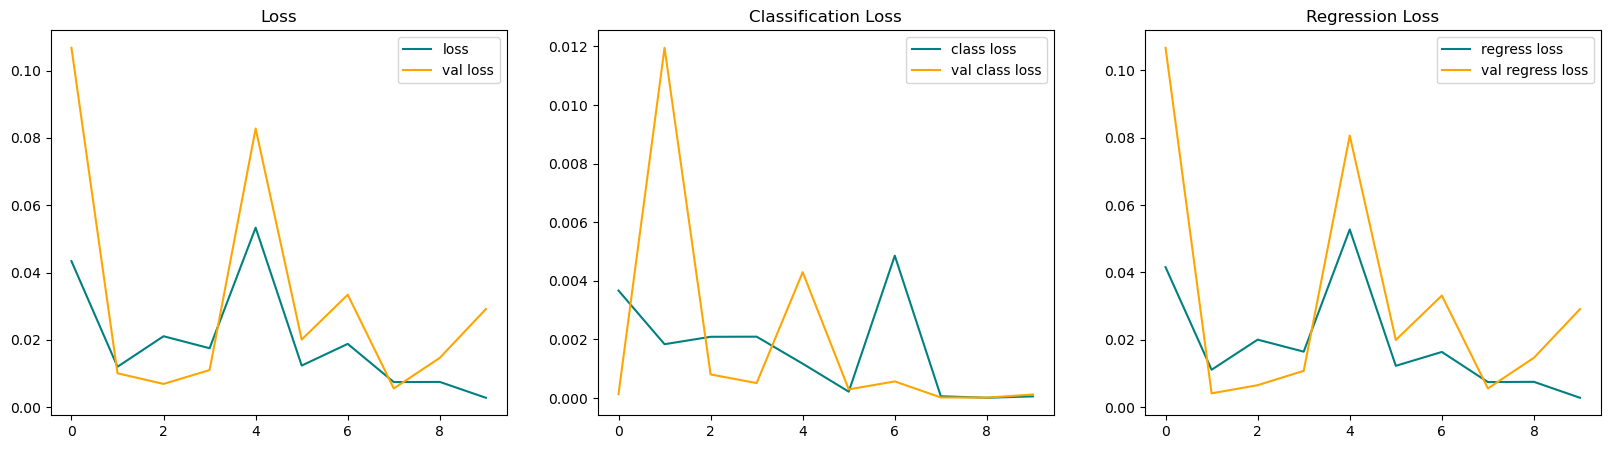

In [266]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [267]:
test_data = test.as_numpy_iterator()

In [268]:
test_sample = test_data.next()

In [269]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 415ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


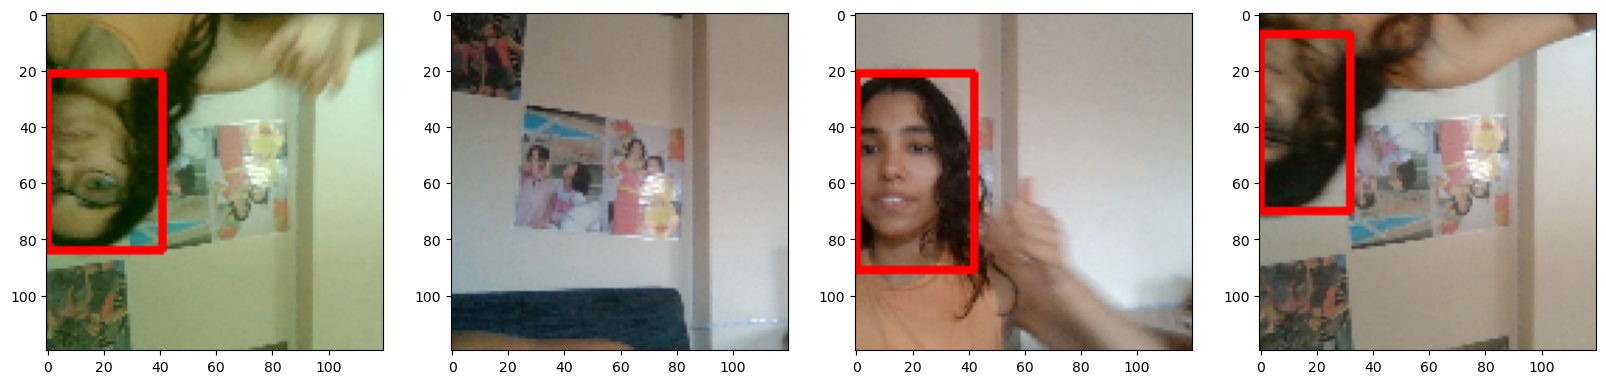

In [270]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9: #checking if classification loss is greater than 0.9 
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [271]:
from tensorflow.keras.models import load_model # saving the model 

In [272]:
facetracker.save('facetracker.h5') # saving the model 

In [273]:
facetracker = load_model('facetracker.h5')

In [274]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 360ms/step


KeyboardInterrupt: 